In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Load the dataset
data = pd.read_csv('adult11.csv')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Display the first few rows of the dataset
print("Head of the dataset:")
print(data.head())

Head of the dataset:
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18          ?  103497  Some-college             10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-coun

In [5]:
# Display the tail of the dataset
print("\nTail of the dataset:")
print(data.tail())


Tail of the dataset:
       age     workclass  fnlwgt   education  education-num  \
48837   27       Private  257302  Assoc-acdm             12   
48838   40       Private  154374     HS-grad              9   
48839   58       Private  151910     HS-grad              9   
48840   22       Private  201490     HS-grad              9   
48841   52  Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation relationship   race  gender  \
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country salary  
48837             0             0              38  United-States  <=

In [6]:
# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [7]:
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [21]:
# Data Preprocessing
# Handle missing values (example: fill with mean for numerical columns)
data.fillna({'age':data.mean()}, inplace=True)
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_>50K
0,25,226802,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,10,0,0,30,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48838,40,154374,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
48839,58,151910,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48840,22,201490,9,0,0,20,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [22]:
# Encode categorical variables if necessary (example: using one-hot encoding)
data = pd.get_dummies(data, drop_first=True)
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_>50K
0,25,226802,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,10,0,0,30,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48838,40,154374,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
48839,58,151910,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48840,22,201490,9,0,0,20,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [23]:
# Define features and target variable
# Replace 'target_column' with the name of your target variable
X = data.drop('education-num', axis=1)
y = data['education-num']
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_>50K
0,25,226802,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,10,0,0,30,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48838,40,154374,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
48839,58,151910,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48840,22,201490,9,0,0,20,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Model Implementation
# Initialize the model
model = LinearRegression()

In [26]:
# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# Make predictions
y_pred = model.predict(X_test)

In [28]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Model Evaluation Metrics:
Mean Absolute Error: 5.218372223571231e-10
Mean Squared Error: 7.628483937450934e-19
R-squared: 1.0


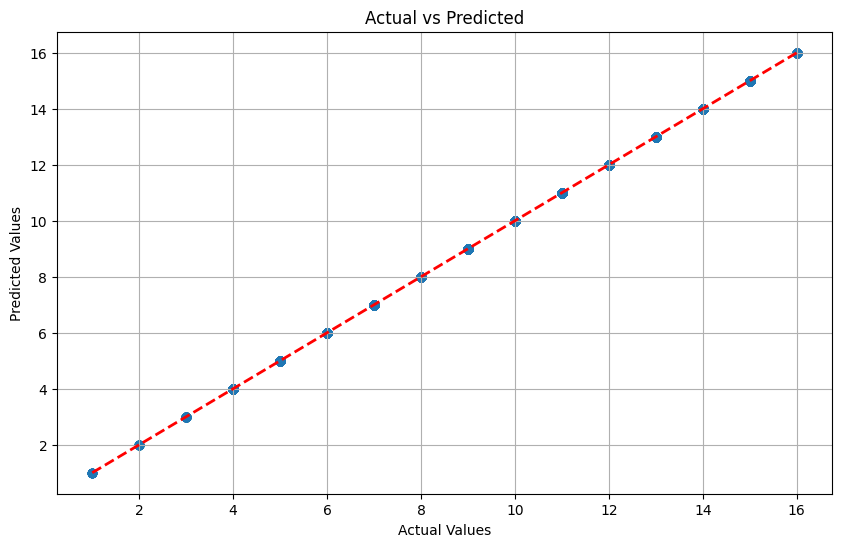

In [30]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

In [32]:
# Set the style for seaborn
sns.set(style="whitegrid")

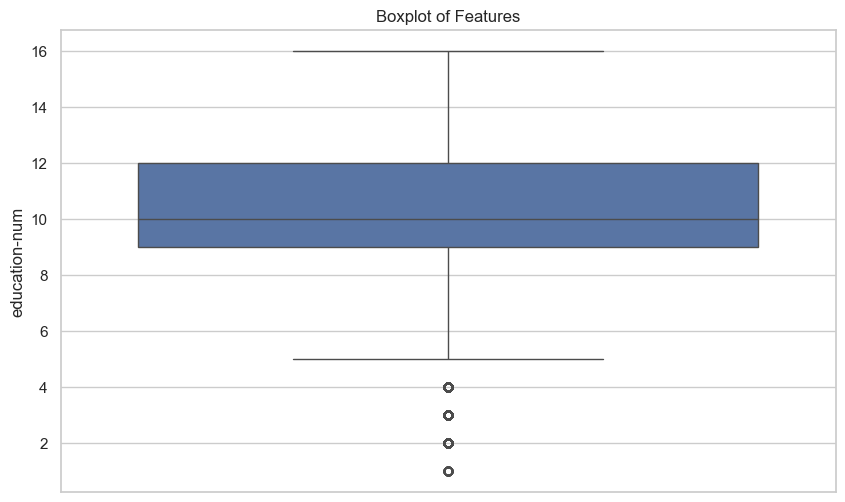

In [35]:
# 1. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['education-num'])
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

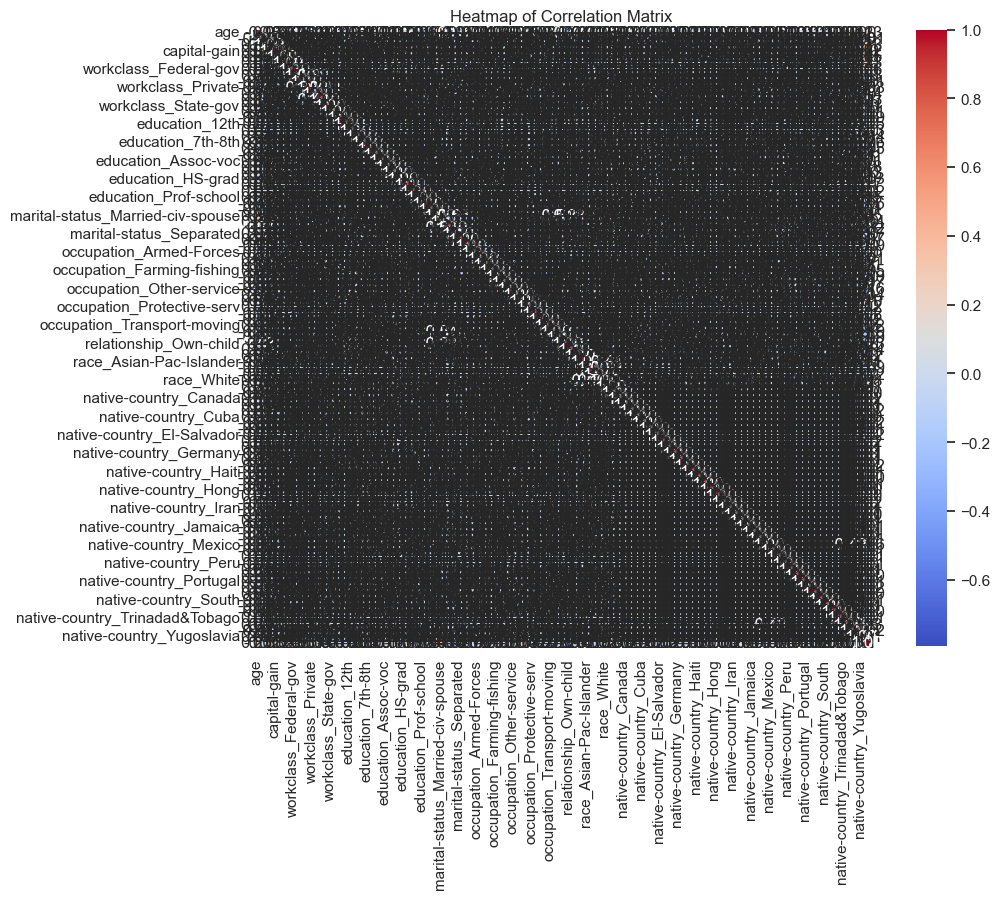

In [37]:
# 2. Heatmap (Correlation Matrix)
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

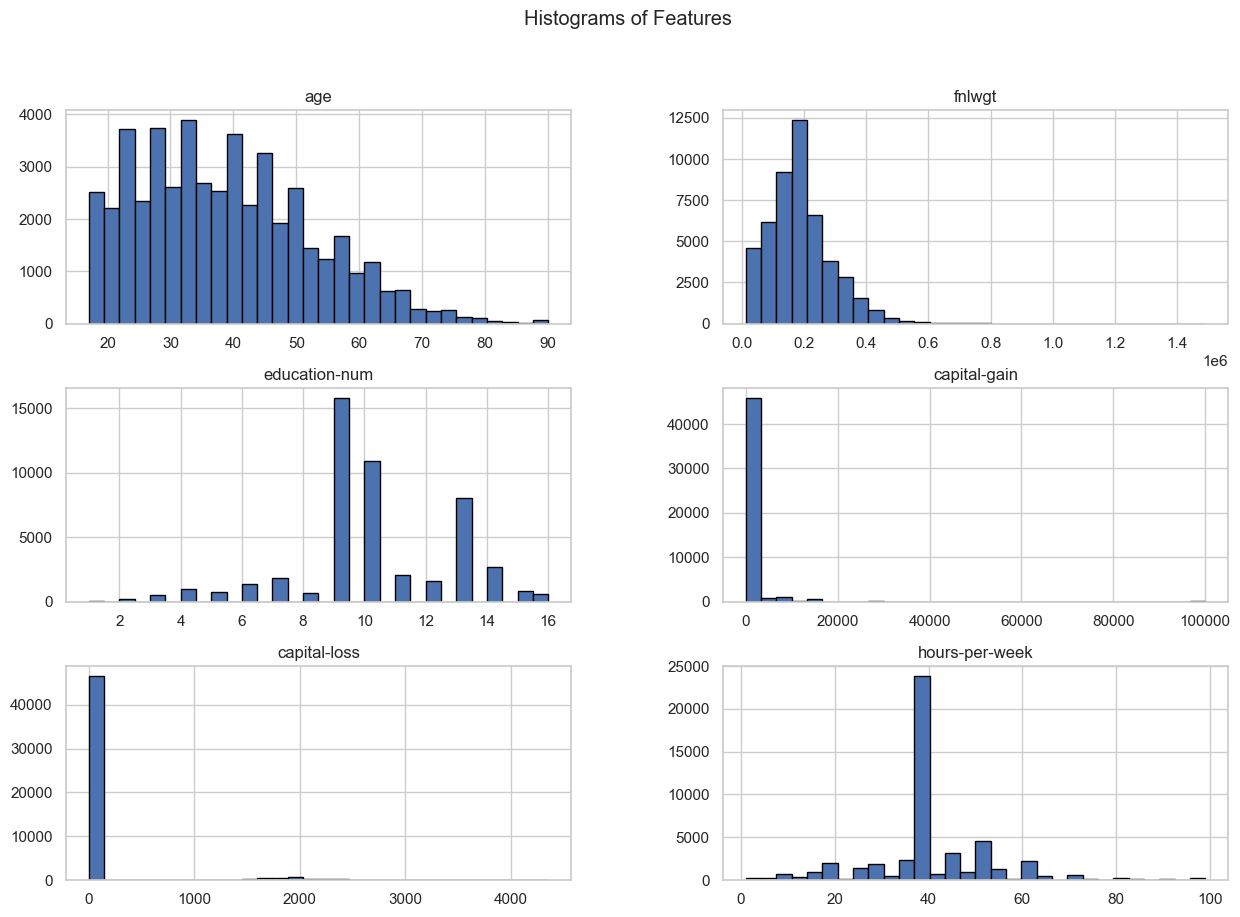

In [38]:
# 3. Histogram
plt.figure(figsize=(10, 6))
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

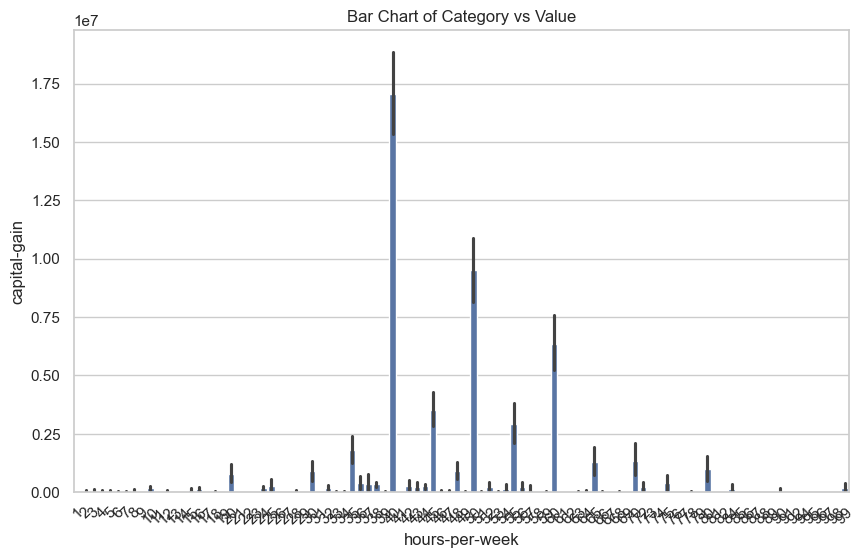

In [45]:
# 4. Bar Chart

plt.figure(figsize=(10, 6))
sns.barplot(x='hours-per-week', y='capital-gain', data=data, estimator=sum)
plt.title('Bar Chart of Category vs Value')
plt.xticks(rotation=45)
plt.show()



In [39]:
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_>50K
0,25,226802,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,10,0,0,30,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48838,40,154374,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
48839,58,151910,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48840,22,201490,9,0,0,20,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


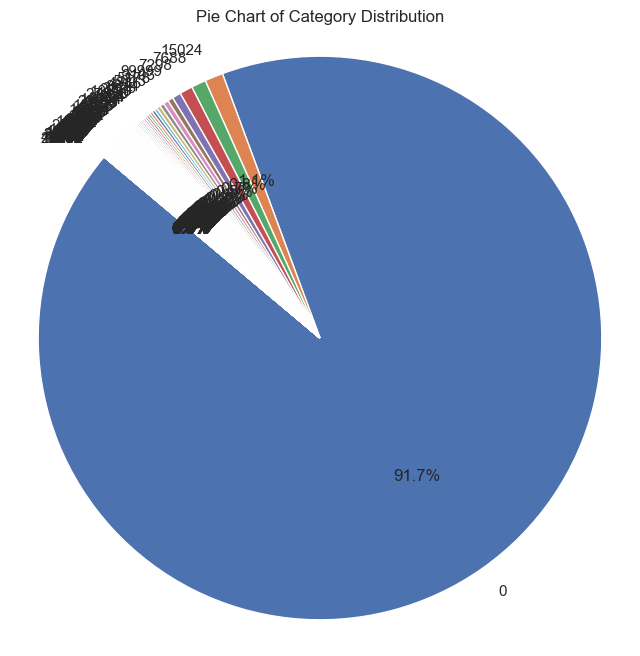

In [50]:
# 5. Pie Chart
# Assuming you have a categorical column 'category_column' to visualize
# Replace 'category_column' with your actual column name
category_counts = data['capital-gain'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()